# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [163]:
import numpy as np
from sklearn.datasets import fetch_openml
import pandas as pd
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

C:\Users\berka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


### Now take a look at the shapes of the X and y matricies 

In [164]:
display(X.shape)
display(y.shape)

(70000, 784)

(70000,)

### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [165]:
X.iloc[36000,:]

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 36000, Length: 784, dtype: float64

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

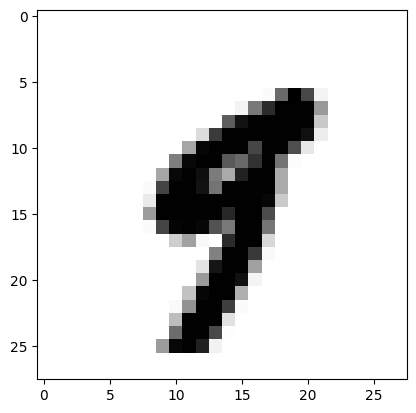

In [166]:
import matplotlib.pyplot as plt
import matplotlib

# assuming the number is stored in a variable called “number”
number_reshaped = X.iloc[36000,:].values.reshape(28,28)
plt.imshow(number_reshaped, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.show()

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [167]:
y.iloc[36000]

'9'

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [168]:
# Split the data into training and testing sets
X_train = X.iloc[:60001]
X_test = X.iloc[60001:]

y_train = y.iloc[:60001]
y_test = y.iloc[60001:]

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [169]:
y_train_5s = np.where(y_train == '5', 1, 0)
y_test_5s = np.where(y_test == '5', 1, 0)

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [170]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay

log_model = LogisticRegression()

trans=PowerTransformer()
trans.fit(X_train)
X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log_model.fit(X_train_mod, y_train_5s)

C:\Users\berka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [171]:
y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

In [172]:
performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train_5s, y_pred_train_log),
                                         precision_score(y_train_5s, y_pred_train_log),
                                         recall_score(y_train_5s, y_pred_train_log)],
                               'Test': [accuracy_score(y_test_5s, y_pred_test_log),
                                        precision_score(y_test_5s, y_pred_test_log),
                                        recall_score(y_test_5s, y_pred_test_log)]})

display(performance_log)

,Error_metric,Train,Test
0,Accuracy,0.975317,0.975398
1,Precision,0.906689,0.913043
2,Recall,0.810183,0.800448


### Does the classifier predict correctly the 36000th digit we picked before?

In [173]:
y_pred_train_log[36000]

0

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [174]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [180]:
never_5_clf.fit(X_train_mod, y_train_5s)

never_5_pred_train_log = never_5_clf.predict(X_train_mod)
never_5_pred_test_log = never_5_clf.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train_5s, never_5_pred_train_log),
                                         precision_score(y_train_5s, never_5_pred_train_log),
                                         recall_score(y_train_5s, never_5_pred_train_log)],
                               'Test': [accuracy_score(y_test_5s, never_5_pred_test_log),
                                        precision_score(y_test_5s, never_5_pred_test_log),
                                        recall_score(y_test_5s, never_5_pred_test_log)]})

display(performance_log)

C:\Users\berka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\berka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Error_metric,Train,Test
0,Accuracy,0.909652,0.910791
1,Precision,0.000000,0.000000
2,Recall,0.000000,0.000000


### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

print("Logistic regression")
print(precision_score(y_train_5s, y_pred_train_log))
print(recall_score(y_train_5s, y_pred_train_log))
print(f1_score(y_train_5s, y_pred_train_log))

print("Never 5 Classifier")
print(precision_score(never_5_pred_train_log, y_pred_train_log))
print(recall_score(never_5_pred_train_log, y_pred_train_log))
print(f1_score(never_5_pred_train_log, y_pred_train_log))

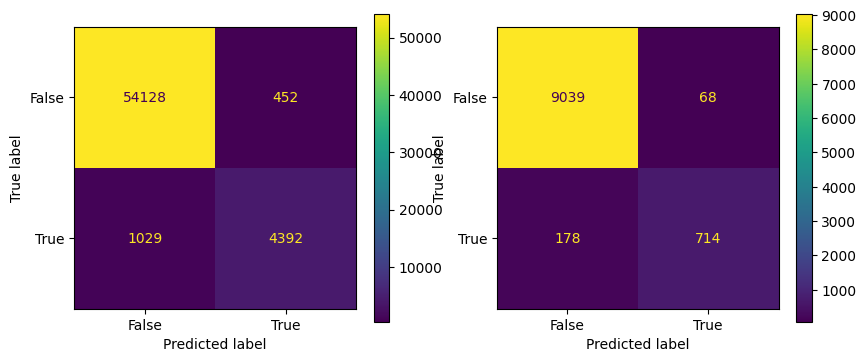

In [183]:
from sklearn import metrics
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,4))
confusion_matrix_train = metrics.confusion_matrix(y_train_5s, y_pred_train_log)
cm_display_train = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_train, display_labels = [False, True]).plot(ax = ax1)
confusion_matrix_test = metrics.confusion_matrix(y_test_5s, y_pred_test_log)
cm_display_test = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_test, display_labels = [False, True]).plot(ax = ax2)

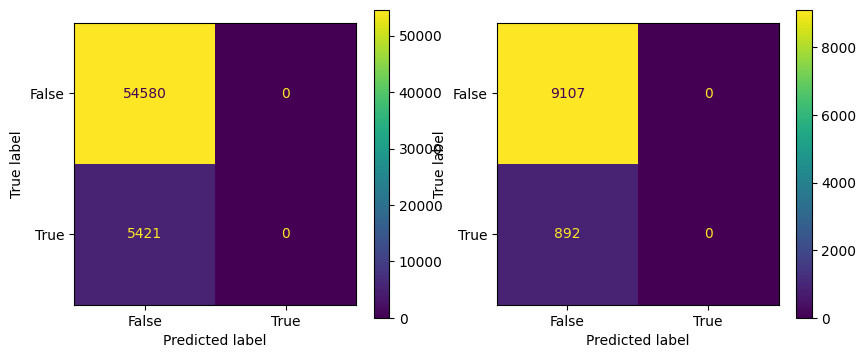

In [184]:
from sklearn import metrics
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,4))
confusion_matrix_train = metrics.confusion_matrix(y_train_5s, never_5_pred_train_log)
cm_display_train = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_train, display_labels = [False, True]).plot(ax = ax1)
confusion_matrix_test = metrics.confusion_matrix(y_test_5s, never_5_pred_test_log)
cm_display_test = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_test, display_labels = [False, True]).plot(ax = ax2)

### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [ ]:
# First model works and not the second one.

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

C:\Users\berka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


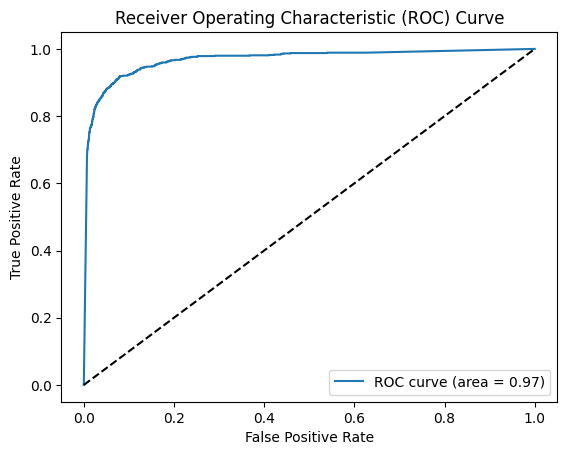

In [195]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the test set
probs = log_model.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test_5s, probs)

# Compute the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

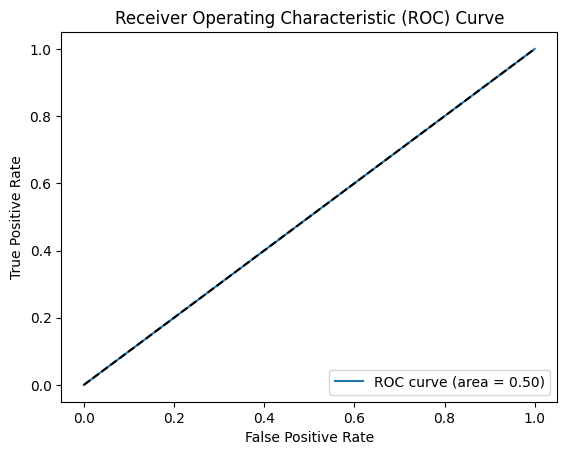

In [198]:
# Predict probabilities for the test set
# probs2 = never_5_clf.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test_5s, never_5_pred_test_log)

# Compute the Area Under the Curve (AUC)
roc_auc2 = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Now find the roc_auc_score for each. 

In [ ]:
# 0.97 for Logistic Regression.
# 0.50 for 5 classifier dumb model.

### What does this metric tell you? Which classifier works better with this metric in mind?